Imports e definição do dataset.


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
    Input,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

mnist = tf.keras.datasets.mnist

print(tf.__version__)


2.18.0


O exemplo abaixo mostra as 10 primeiras imagens de treino e teste do MNIST:

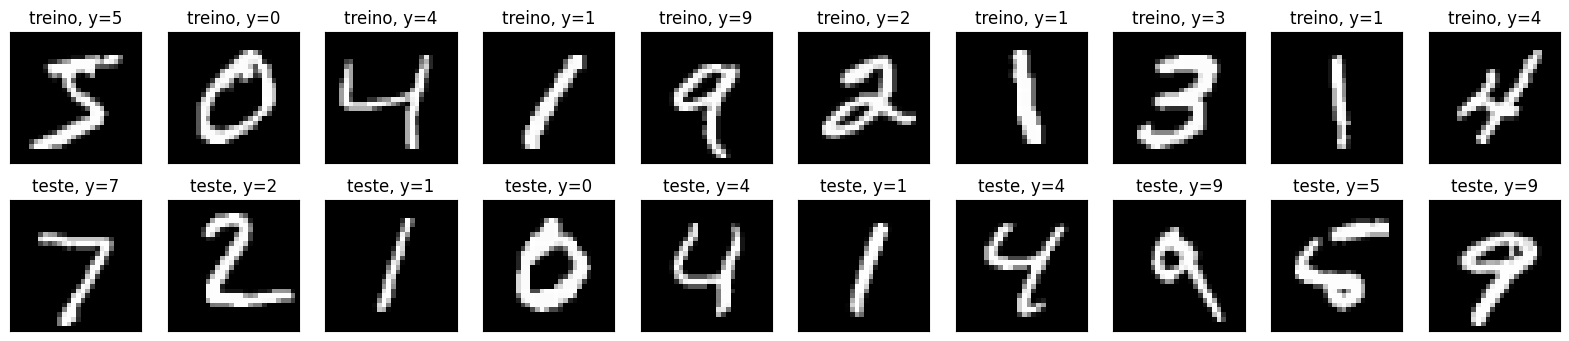

In [7]:
# mostrar as 10 primeiras imagens de treino e teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # treino
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(f"treino, y={y_train[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # teste
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(f"teste, y={y_test[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

A celula abaixo tem a definição de uma rede neural para ser usada no dataset MNIST. Você pode modifica-la como quiser (e.g. adicionar convoluções e/ou mais camadas ocultas) para melhorar o desempenho. Somente não pode modificar o número de neuronios de saida e a métrica de acurácia.



In [8]:
def get_mnist_network():
    network = tf.keras.models.Sequential()

    network.add(Flatten(input_shape=(28,28)))    # 1 camada de entrada (achatando a entrada pra imagem 28x28 virar um vetor)
    network.add(Dense(10, activation=tf.nn.softmax)) # 1 camada de saida com 10 neuronios (1 por classe)

    network.compile(
        optimizer='sgd',                        # otimizador SGD
        loss='sparse_categorical_crossentropy', # entropia cruzada adaptada para multiplas classes
        metrics=['accuracy']                    # métrica final de desempenho (nao modifique!)
    )

    return network

A celula abaixo tem um exemplo de execucao da rede neural do MNIST naquele dataset. Modifique para executar por 10 épocas e adicione código para medir o tempo gasto.


In [9]:
import time

network = get_mnist_network()                                            # obtem a rede
(x_train, y_train),(x_test, y_test) = mnist.load_data()                  # carrega o dataset
init = time.time()
network.fit(x_train, y_train, epochs=10, batch_size=512)                 # treina a rede
end = time.time()
loss, accuracy = network.evaluate(x_test, y_test)                        # avalia a rede

print(f"Tempo gasto: {end-init:.2f} segundos")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6760 - loss: 800.0097
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 137.2368
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 135.3280
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8613 - loss: 116.5559
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8720 - loss: 105.1032
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8587 - loss: 121.3826
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8612 - loss: 135.2253
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8870 - loss: 89.1552
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 154.7707
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8737 - loss: 106.6828
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7823 - loss: 152.6513
Tempo gasto: 8.55 segundos


## Tarefa

Escreva código para executar redes neurais nos seguintes datasets:
- MNIST (pode aproveitar o codigo existente)
- Fashion MNIST
- CIFAR-10
- CIFAR-100

Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset (a do MNIST deve ser feita na `get_mnist_network()` acima).

IMPORTANTE: as funções `get_X_network()` não devem TREINAR nem AVALIAR  a rede neural, apenas instancia-la para o problema X (MNIST, Fashion MNIST, etc) e retorna-las.

Ao final, preencha o dict `results` com o desempenho encontrado em cada execução.

In [10]:
# classe auxiliar para facilitar a medição do tempo gasto.

class TimeHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0

    def on_train_begin(self, logs={}):
        self.times = {}

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()
        self.epoch += 1

    def on_epoch_end(self, batch, logs={}):
        self.times[self.epoch] = (time.time() - self.epoch_time_start)

    def _total_time(self):
        return sum(self.times.values())

In [37]:
def get_mnist_network():
    network = tf.keras.models.Sequential()

    network.add(Input(shape=(28, 28, 1)))
    network.add(Conv2D(16, (3,3), activation='relu')) # 1 camada de convolução: 16 filtros 3x3
    network.add(MaxPooling2D((2,2), strides=2)) # max pooling 2x2
    network.add(Flatten()) # achatar p/ entrar em MLP
    network.add(Dense(20, activation='relu')) # 1 camada oculta
    network.add(Dense(10, activation='softmax')) # 1 camada de saida com 10 neuronios

    network.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return network

def get_fashion_mnist_network():
    network = tf.keras.models.Sequential()

    network.add(Input(shape=(28, 28, 1)))
    network.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
    network.add(MaxPooling2D((2,2)))
    network.add(Conv2D(64, (3,3), activation='relu'))
    network.add(MaxPooling2D((2,2)))
    network.add(Flatten())
    network.add(Dense(64, activation='relu'))
    network.add(Dense(10, activation='softmax'))

    network.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return network

def get_cifar10_network():
    network = Sequential()

    network.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    network.add(BatchNormalization())
    network.add(Conv2D(64, (3, 3), activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.25))

    network.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(Conv2D(128, (3, 3), activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.35))

    network.add(Flatten())
    network.add(Dense(512, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(10, activation='softmax'))
    network.compile(
        optimizer= Adam(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return network

def get_cifar100_network():
    network = tf.keras.models.Sequential()

    network.add(Input(shape=(32, 32, 3)))
    network.add(Conv2D(16, (3,3), activation='relu')) # 1 camada de convolução: 16 filtros 3x3
    network.add(MaxPooling2D((2,2), strides=2)) # max pooling 2x2
    network.add(Flatten()) # achatar p/ entrar em MLP
    network.add(Dense(60, activation='relu')) # 1 camada oculta
    network.add(Dense(100, activation='softmax')) # 1 camada de saida com 100 neuronios

    network.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return network

In [32]:
def train_eval_mnist_pipeline(model, dataset, epochs):
    # cria a instância da classe TimeHistory
    time_callback = TimeHistory()

    # faz o unpack do dataset
    (x_train, y_train),(x_test, y_test) = dataset.load_data()

    # treina o modelo
    model.fit(x_train, y_train, epochs=epochs, batch_size=512, callbacks=[time_callback])

    # avalia o modelo
    loss, accuracy = model.evaluate(x_test, y_test)

    return {
        'loss': loss,
        'accuracy' : accuracy,
        'time_callbacks' : time_callback
    }

def train_eval_cifar_pipeline(model, dataset, epochs):
    # cria a instância da classe TimeHistory
    time_callback = TimeHistory()

    # faz o unpack do dataset
    (X_train, y_train),(X_test, y_test) = dataset.load_data()

    # normaliza os dados
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    num_classes = len(set(y_train.reshape(-1)))

    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    # reduz o LR quando a acurácia para de melhorar
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',
                                    factor=0.5, patience=2,
                                    verbose=1, min_lr=1e-5)

    # treina o modelo
    model.fit(X_train,
              y_train,
              epochs=epochs,
              batch_size=512,
              callbacks=[time_callback, lr_scheduler])

    # avalia o modelo
    loss, accuracy = model.evaluate(X_test, y_test)

    return {
        'loss': loss,
        'accuracy' : accuracy,
        'time_callbacks' : time_callback
    }

## MNIST Clássico:
---

In [13]:
# dataset
mnist_dataset = tf.keras.datasets.mnist

# rede neural
mnist_network = get_mnist_network()

# pipeline de treino e avaliação
classic_mnist_results = train_eval_mnist_pipeline(mnist_network, mnist, 10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.2983 - loss: 5.5715
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.6780 - loss: 0.9697
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8110 - loss: 0.5550
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.9102 - loss: 0.3157
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9455 - loss: 0.2120
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9534 - loss: 0.1761
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9606 - loss: 0.1470
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9636 - loss: 0.1374
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9682 - loss: 0.1141
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9706 - loss: 0.1042
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9538 - loss: 0.1979


## Fashion MNIST:
---

In [13]:
# dataset
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist

# rede neural
fashion_mnist_network = get_fashion_mnist_network()

# pipeline de treino e avaliação
fashion_results = train_eval_mnist_pipeline(fashion_mnist_network, fashion_mnist_dataset, epochs=10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
       0/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 395ms/step - accuracy: 0.5521 - loss: 5.7476
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 46s 390ms/step - accuracy: 0.8332 - loss: 0.4660
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 401ms/step - accuracy: 0.8565 - loss: 0.3987
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 86s 438ms/step - accuracy: 0.8717 - loss: 0.3515
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 425ms/step - accuracy: 0.8818 - loss: 0.3267
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 455ms/step - accuracy: 0.8858 - loss: 0.3057
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 414ms/step - accuracy: 0.8971 - loss: 0.2823
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 47s 399ms/step - accuracy: 0.9024 - loss: 0.2642
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 50s 428ms/step - accuracy: 0.9039 - loss: 0.2557
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 439ms/step 

## CIFAR-10
---

In [ ]:
# dataset
cifar_10_dataset = tf.keras.datasets.cifar10

# rede neural
cifar_10_network = get_cifar10_network()

# pipeline de treino e avaliação
dict_test = train_eval_cifar_pipeline(cifar_10_network, cifar_10_dataset, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 783s 8s/step - accuracy: 0.3084 - loss: 2.6752 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 811s 8s/step - accuracy: 0.5153 - loss: 1.3485 - learning_rate: 0.0010
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 793s 8s/step - accuracy: 0.5999 - loss: 1.1210 - learning_rate: 0.0010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 800s 8s/step - accuracy: 0.6676 - loss: 0.9377 - learning_rate: 0.0010
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 822s 8s/step - accuracy: 0.7082 - loss: 0.8248 - learning_rate: 0.0010
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 812s 8s/step - accuracy: 0.7375 - loss: 0.7407 - learning_rate: 0.0010
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 864s 8s/step - accuracy: 0.7584 - loss: 0.6849 - learning_rate: 0.0010
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 846s 8s/step - accuracy: 0.7800 - loss: 0.6270 - learning_rate: 0.0010
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 806s 8s/step - accuracy: 0.7940 - loss: 0.5807 - learning_rate: 0.0010
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 786s 8s/step - accuracy: 0.8121 - loss: 0.5315 - learning_rate: 0.0010
313/313 ━━━━━━━━━━━━━━━━━━━━ 

## CIFAR-100
---

In [38]:
# dataset
cifar_100_dataset = tf.keras.datasets.cifar100

# rede neural
cifar_100_network = get_cifar100_network()

# pipeline de treino e avaliação
cifar100_results = train_eval_cifar_pipeline(cifar_100_network, cifar_100_dataset, epochs=10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.0271 - loss: 4.5086 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.0944 - loss: 3.9904 - learning_rate: 0.0010
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.1353 - loss: 3.7416 - learning_rate: 0.0010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.1592 - loss: 3.6064 - learning_rate: 0.0010
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.1798 - loss: 3.4841 - learning_rate: 0.0010
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - accuracy: 0.1947 - loss: 3.3896 - learning_rate: 0.0010
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.2133 - loss: 3.2944 - learning_rate: 0.0010
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.2223 - loss: 3.2323 - learning_rate: 0.0010
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.2359 - loss: 3.1598 - learning_rate: 0.0010
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 210ms/step - accuracy: 0.2450 - loss: 3.1158 - learning_rate: 0.0010
313/313 ━━━

In [39]:
dict_test['time_callbacks']._total_time()

309.0502562522888

Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Pré-processamento
x_train = x_train / 255.0  # Normaliza para [0,1]
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encoding
y_test = to_categorical(y_test, 10)

# 3. Definir o modelo (Perceptron simples: sem camadas ocultas)
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Transformar imagem 2D em vetor 1D
    Dense(10, activation='softmax')  # Camada de saída com 10 classes
])

# 4. Compilar
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Treinar por no máximo 10 épocas
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# 6. Avaliar
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nAcurácia no teste: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8198 - loss: 0.7730 - val_accuracy: 0.8816 - val_loss: 0.4755
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8827 - loss: 0.4538 - val_accuracy: 0.8963 - val_loss: 0.3972
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8919 - loss: 0.4019 - val_accuracy: 0.9028 - val_loss: 0.3651
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8975 - loss: 0.3759 - val_accuracy: 0.9068 - val_loss: 0.3468
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9011 - loss: 0.3594 - val_accuracy: 0.9106 - val_loss: 0.3346
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9036 - loss: 0.3479 - val_accuracy: 0.9106 - val_loss: 0.3254
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9058 - loss: 0.3390 - val_accuracy: 0.9120 - val_loss: 0.3193
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9073 - loss: 0.3320 - val_accuracy: 0.9141 - val_loss: 0.3150
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9089 - loss: 0.3261 - val_accuracy: 0.9138 - 

In [ ]:
results = {
    "mnist": {"time": 182, "acc": 0.9625},
    "fashion_mnist": {"time": 659, "acc": 0.9584},
    "cifar10": {"time": 8164, "acc": 0.7933},
    "cifar100": {"time": 309, "acc": 0.2371},
}

## Perguntas:
---
1) Em quais datasets um perceptron simples (sem convolução e sem camadas ocultas) obtem uma acurácia acima de 80%?
* **R**: A partir de tentativa e erro, apenas no dataset do MNIST clássico um perceptron simples foi capaz de atingir acurácia acima de 80%.

2) Qual a acurácia máxima obtida no CIFAR-10? Qual modificação teve maior impacto positivo? Qual o maior desafio/dificuldade?
* **R**: Utilizando uma rede mais robusta, consegui atingir acurácia de 79.3% no conjunto de teste. A modificação que teve maior impacto foi a normalização dos dados para o intervalo entre 0 e 1. O maior desafio foi conseguir deixar a acurácia maior sem aumentar exponencialmente o tempo de treinamento em 10 épocas.

3) Foi possivel obter mais de 60% de acurácia no CIFAR-100? Qual modificação teve maior impacto positivo? Qual o maior desafio/dificuldade?
* **R**: Para minhas tentantivas, não. Imagino que, assim como no dataset do CIFAR-10, a normalização dos dados e a utilização de _Batch Normalization_ é crucial para se atingir acurácias superiores a 60%.

4) Quais fatores (tanto das próprias redes quanto dos dados) levam as redes neurais a melhorarem o desempenho? E quais fatores tornam o desempenho pior?
* **R**: Podemos citar como fatores que melhoram o desempenho das redes:
    * Normalização dos dados: Estabilizam mais as redes e tendem a acelerar o treinamento;
    * Normalização em lotes (_Batch Normalization_): Também ajudam a estabilizar os dados e a garantir que os gradientes não fiquem muito instáveis durante o treinamento;
    * Funções de ativação bem escolhidas: Este é um ponto especial, pois a má escolha da função de ativação pode fazer com que o modelo leve muito mais tempo para ser treinado, além de não garantir uma maior acurácia;
    * Taxa de aprendizado bem definida: Ajuda no modelo a convergir de forma mais acelarada e a não ficar preso em mínimos locais, a depender da solução escolhida.
    * Quantidade de 'neurônios' por camada: Ajudam na capacidade do modelo de se ajustar a distribuições de dados mais complexas, como é o caso de imagens.
    * Camadas Convolucionais: Ajudam na extração de padrões representativos dos dados.
    * Autoencoders: Podem ajudar na redução de dimensionalidade e também na redução de ruídos.
    * Quanto aos dados, estes também podem contribuir para melhorar o desempenho de um modelo, caso:
        * Apresentem um balanceamento das classes, pois ajuda na representativadade de cada classe;
        * Tenham poucos ruídos e outliers;
        * Apresentem boa diversidade.
* Falando agora dos fatores que podem prejudicar os modelos, podemos citar:
    * Redes muito rasas: São incapazes de se ajustar a dados mais complexos;
    * Taxa de aprendizado mal definida: Pode fazer o modelo demorar muito parar convergir ou então podemo fazer ele dar saltos muito grandes, impossibilitando a convergência.
    * Redes extremamente profundas e mal ajustadas: Aprendem tão bem o conjunto de treino que modelam até os ruídos, tendendo a performar muito mal no conjunto de testes.
    * Falta de normalizações: Podem deixar a rede muito instável e fazer com que demore demais para treinar.
    * Quanto aos dados, estes também podem contribuir para piorar o desempenho de um modelo, caso:
        * Apresentem um desbalanceamento das classes, gerando uma dominância da classe predominante e fazendo com que, se mal treinado, faça a rede tender a sempre escolher a classe dominante;
        * Tenham muitos ruídos e outliers;
        * Apresentem baixa diversidade.